In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pandas as pd

In [67]:
coilradius=0.0442
maglength=0.087
magradius=0.0025
numdipoles=15
changepoint=1*coilradius #Where the far field approximation takes full effect

In [21]:
df_meas = pd.read_excel('Book1.xlsx', names=['times','coil1','coil2','coil3','coil4'])
df_theo = pd.read_excel('theovoltagefromlab.xlsx', names=['coil1','coil2','coil3','coil4'])

Sigmoid function $$S(x; m_i, m_x) = m_i + (m_x-m_i) * f\left(\frac{x-m_i}{m_x-m_i} \right)$$

where $$f(x)= \frac{1}{1+200^{-t+0.5}} $$

This is used as a smooth step function when the magnetic dipole changes from far field to close field approximation.

In [32]:
def sigmoid(x,mi, mx): return mi + (mx-mi)*(lambda t: (1+200**(-t+0.5))**(-1) )( (x-mi)/(mx-mi) )

Sample plot.

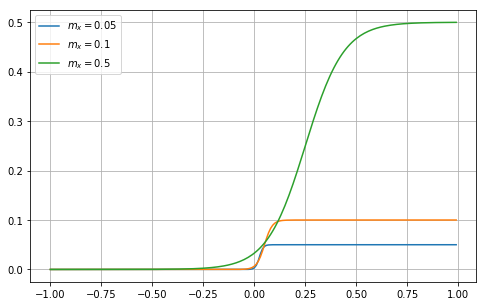

In [47]:
xx = np.arange(-1, 1, 0.01)
mx1 = 0.05; mx2 = 0.1; mx3 = 0.5; mi=0

fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(xx, sigmoid(xx,mi,mx1), label='$m_x=0.05$')
ax.plot(xx, sigmoid(xx,mi,mx2), label='$m_x=0.1$')
ax.plot(xx, sigmoid(xx,mi,mx3), label='$m_x=0.5$')
ax.legend()
ax.grid()
plt.show()

In [72]:
#This correpsponds to the contribution from the close field approximation for each dipole.

def sigmoidcontribution(height):
    int_func = lambda x: x*(8*np.pi/3)*(1-sigmoid(x,0,1.45*coilradius))*(1-sigmoid(abs(height),0,1.45*changepoint))
    return 2*np.pi*quad(int_func, 0, coilradius)[0]

# Calculates the flux through the loop due to a dipole located at some height above the loop

def fluxthroughloopfromdipole(height):
    dipolebound=changepoint
    return 2*np.pi*(coilradius**2)/(coilradius**2+height**2)**(1.5)+sigmoidcontribution(height)

# Calculates the total flux through the loop due to the center of the magnet at some height above the coil

def fluxthroughloop(height):
    deltah=maglength/(numdipoles+1)
    x=-maglength/2+deltah
    flux=0
    while(x<maglength/2):
        flux=flux+fluxthroughloopfromdipole(height+x)
        x=x+deltah
    return flux

In [73]:
# Returns the height above each of the 4 loops as a function of time (t)

def heightaboveloop1(t):
    return 0.141-4.833*t*t

def heightaboveloop2(t):
    return 0.392-4.833*t*t

def heightaboveloop3(t):
    return 0.640-4.833*t*t

def heightaboveloop4(t):
    return 0.893-4.833*t*t

def velocity(t):
    return -9.666*t

# Calculates the induced EMF through each of the 4 loops at a time t

def voltage1(t):
    N=20.0
    deltah=-maglength/10000
    deltat=0.00001
    return N*(fluxthroughloop(heightaboveloop1(t)+deltah)-fluxthroughloop(heightaboveloop1(t)))*velocity(t)/deltah

def voltage2(t):
    N=20.0
    deltah=-maglength/10000
    deltat=0.00001
    return N*(fluxthroughloop(heightaboveloop2(t)+deltah)-fluxthroughloop(heightaboveloop2(t)))*velocity(t)/deltah

def voltage3(t):
    N=20.0
    deltah=-maglength/10000
    deltat=0.00001
    return N*(fluxthroughloop(heightaboveloop3(t)+deltah)-fluxthroughloop(heightaboveloop3(t)))*velocity(t)/deltah

def voltage4(t):
    N=20.0
    deltah=-maglength/10000
    deltat=0.00001
    return N*(fluxthroughloop(heightaboveloop4(t)+deltah)-fluxthroughloop(heightaboveloop4(t)))*velocity(t)/deltah

In [79]:
# Extracts the lab data, the single dipole approxmation data, and puts them in appropriate data structures. Note that the time values
# used are from this data: this makes matching the plots easier.

tvalues = df_meas['times'].values
v1values = df_meas['coil1']
v2values = df_meas['coil2']
v3values = df_meas['coil3']
v4values = df_meas['coil4']
v1theolabvalues = df_theo['coil1']
v2theolabvalues = df_theo['coil2']
v3theolabvalues = df_theo['coil3']
v4theolabvalues = df_theo['coil4']


# This section is where we can change the value of the magnetic moment of each of the n dipoles. Changing this value increases the y scaling
# of the plots created from the code.

magneticmoment=0.462485703
scalefactor=numdipoles/(magneticmoment*10**(-7))

In [80]:
theo_imp = df_meas['test'].values

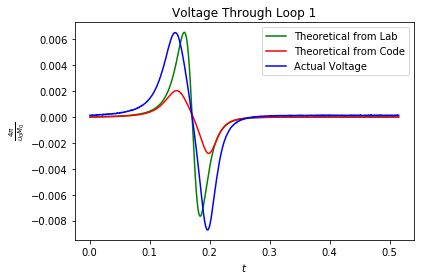

In [81]:
# Creates the plots

label1='Theoretical from Code'
label2='Theoretical from Lab'
label3='Actual Voltage'

plt.figure(1)
plotcur=plt.plot(tvalues, v1theolabvalues, '-g', label=label2)
plt.plot(tvalues, theo_imp/scalefactor, 'r',label=label1)
plt.plot(tvalues, v1values, '-b', label=label3)
plt.xlabel(r"$t$")
plt.ylabel(r"$\frac{4 \pi}{u_0 M_0}$")
plt.legend(loc='upper right')
plt.title("Voltage Through Loop 1")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(2)
plotcur=plt.plot(tvalues, v2theolabvalues, '-g', label=label2)
plt.plot(tvalues, voltage2(tvalues)/scalefactor, 'r',label=label1)
plt.plot(tvalues, v2values, '-b', label=label3)
plt.xlabel(r"$t$")
plt.ylabel(r"$\frac{4 \pi}{u_0 M_0}$")
plt.legend(loc='upper left')
plt.title("Voltage Through Loop 2")
plt.tight_layout()
plt.savefig('sumlabplots/15dipoles2.png', dpi=500)

plt.figure(3)
plotcur=plt.plot(tvalues, v3theolabvalues, '-g', label=label2)
plt.plot(tvalues, voltage3(tvalues)/scalefactor, 'r',label=label1)
plt.plot(tvalues, v3values, '-b', label=label3)
plt.xlabel(r"$t$")
plt.ylabel(r"$\frac{4 \pi}{u_0 M_0}$")
plt.legend(loc='upper left')
plt.title("Voltage Through Loop 3")
plt.tight_layout()
plt.savefig('sumlabplots/15dipoles3.png', dpi=500)

plt.figure(4)
plotcur=plt.plot(tvalues, v4theolabvalues, '-g', label=label2)
plt.plot(tvalues, voltage4(tvalues)/scalefactor, 'r',label=label1)
plt.plot(tvalues, v4values, '-b', label=label3)
plt.xlabel(r"$t$")
plt.ylabel(r"$\frac{4 \pi}{u_0 M_0}$")
plt.legend(loc='upper left')
plt.title("Voltage Through Loop 4")
plt.tight_layout()